In [1]:
## In-Class 20240930 Homework - combining two dataframes (url and news_url) and outputting the combined plots into one single visualization
from key import API_KEY
import requests
import pandas as pd
print(API_KEY)

xISm2VSafEPvBssG1fhbeAP8htfLYhdQ


In [2]:
ticker = "AAPL"
multiplier = 1
timespan = "day"
start_date = "2024-09-01"
end_date = "2024-09-22"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_KEY}"

# print(url)

response = requests.get(url)
data = response.json()

if "results" in data:
    df_stock = pd.DataFrame(data["results"])

    df_stock['t'] = pd.to_datetime(df_stock['t'], unit='ms')

    df_stock.rename(columns={'t': 'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)
else:
    print("Error fetching stock data:", data)

In [3]:
news_url = f"https://api.polygon.io/v2/reference/news?ticker={ticker}&published_utc.gte=2024-09-20&published_utc.lte=2024-09-27&apiKey={API_KEY}"
news_response = requests.get(news_url)
news_data = news_response.json()

df_news = pd.DataFrame(news_data['results'])

df_news['published_utc'] = pd.to_datetime(df_news['published_utc'])

df_news = df_news[['published_utc', 'title']]

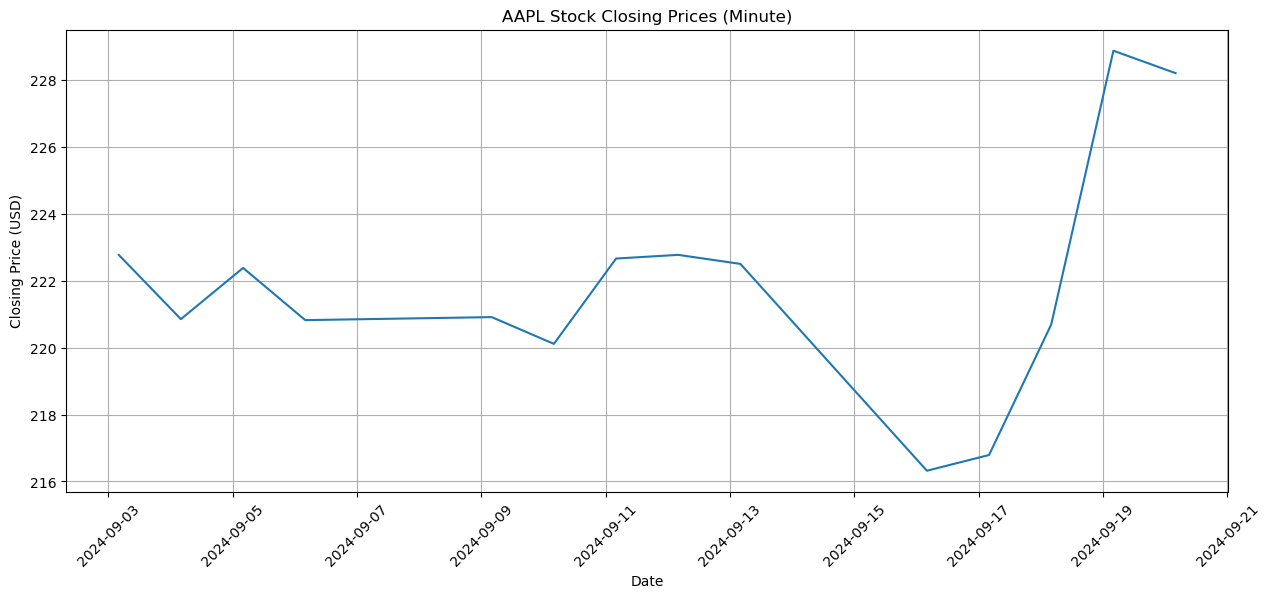

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df_stock['Date'], df_stock['Close'])
plt.title(f"{ticker} Stock Closing Prices (Minute)")
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)

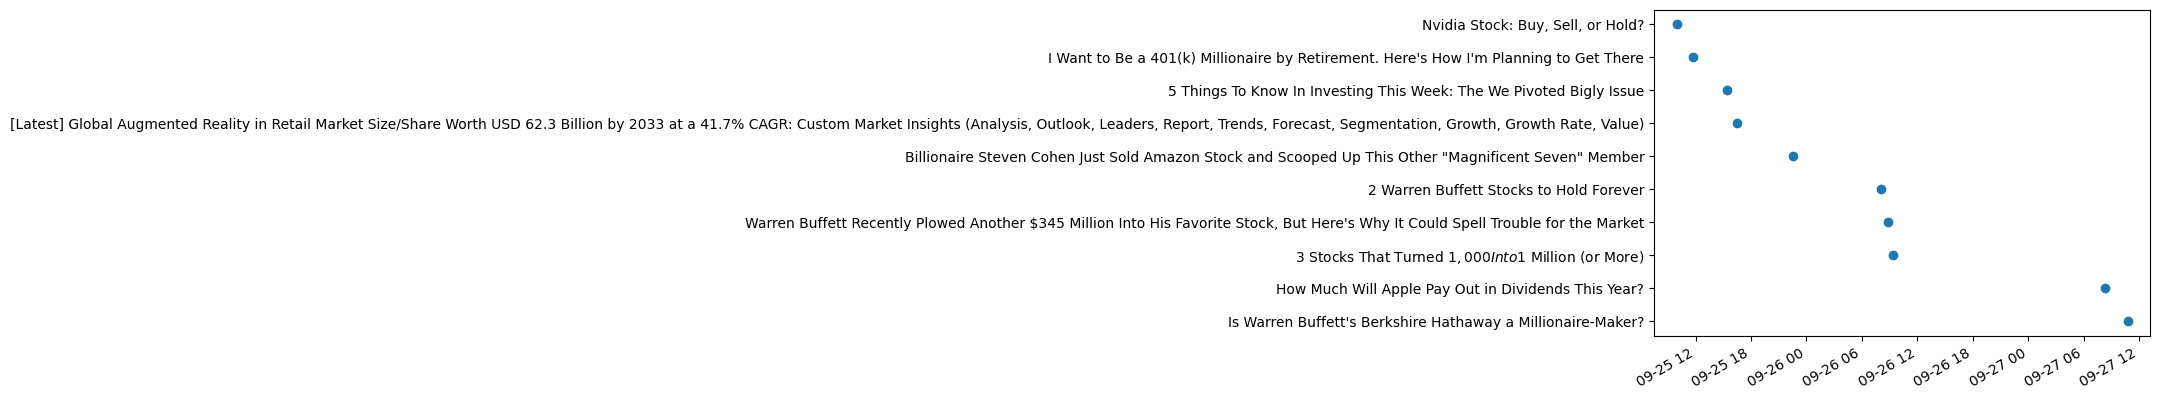

In [5]:
plt.scatter(df_news['published_utc'], df_news['title'])
plt.gcf().autofmt_xdate()

In [6]:
# import everything that allows to use the api key, viewing datasets can happen and to create visualizations
print(API_KEY)
# to fetch stock data
ticker = "AAPL" # helps uniquely identify publicly traded shares
timespan = "day" # daily stock data
multiplier = 1 # works hand-in-hand with timespan to fetch stock data for every "single" day
start_date = "2024-09-01" # data wanted starting from September 1st, 2024
end_date = "2024-09-27" # data retreived up to but not after September 22nd, 2024
url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_KEY}"
print(url)

xISm2VSafEPvBssG1fhbeAP8htfLYhdQ
https://api.polygon.io/v2/aggs/ticker/AAPL/range/1/day/2024-09-01/2024-09-27?apiKey=xISm2VSafEPvBssG1fhbeAP8htfLYhdQ


In [7]:
response = requests.get(url) # to fetch the url while assigning to response
data = response.json() # conversion of response to py dictionary where .json() appears to parse the response content

# check whether API response (data) contains a key like "results"
if "results" in data :
    # conversion done in order to fetch stock data in pandas dataframe format (rows and columns - easier to analyze)
    df_stock = pd.DataFrame(data["results"]) 
    # timestamps in t column are converted into a more readable format (in milliseconds)
    df_stock['t'] = pd.to_datetime(df_stock['t'], unit = 'ms') 
    # renaming to more descriptive column names (without creating a new DataFrame)
    df_stock.rename(columns={'t':'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume',}, inplace = True)

# and if "results" is not found, an error message must be printed
else:
    print("Error fetching stock data:", data)

In [8]:
# onto fetching news data - repeat every line of code from two previous inputs but this time for news
import numpy as np
news_url = f"https://api.polygon.io/v2/reference/news?ticker={ticker}&published_utc.gte=2024-09-20&published_utc.lte=2024-09-27&apiKey={API_KEY}"
news_response = requests.get(news_url)
news_data = news_response.json()

df_news = pd.DataFrame(news_data['results'])
df_news['published_utc'] = pd.to_datetime(df_news['published_utc'])
df_news = df_news[['published_utc', 'title']]

# creating range for stock closing prices to assign y-values close to mid-range b/w min & max  to visulize the combined plots
min_price = df_stock['Close'].min()
max_price = df_stock['Close'].max()
y_values = np.linspace(min_price+(max_price - min_price)*0.2, max_price-(max_price - min_price)*0.2, len(df_news))

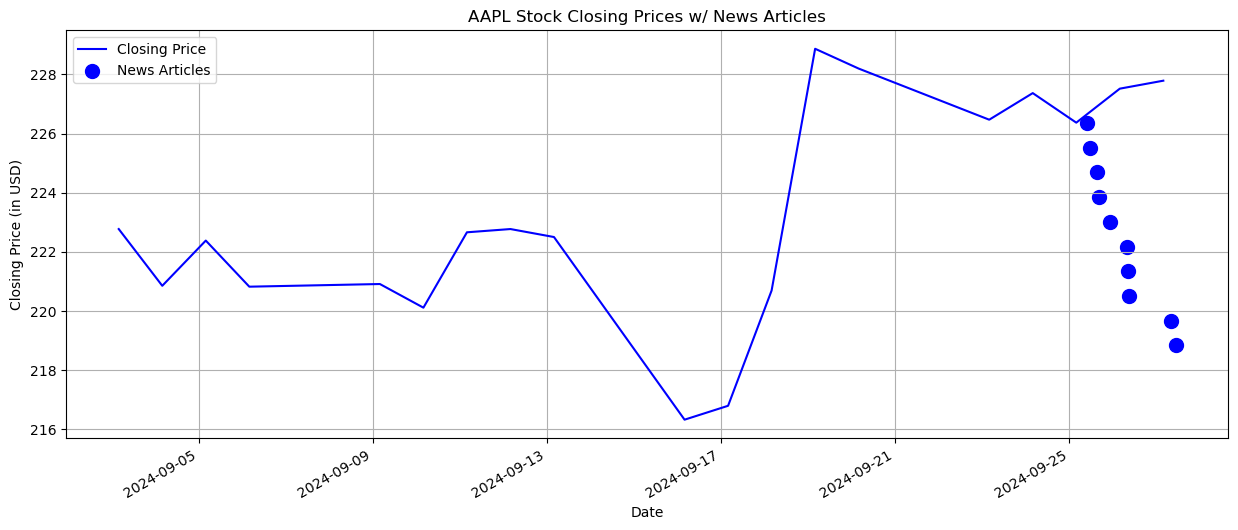

In [9]:
# visualization time - plot and formatting
plt.figure(figsize = (15, 6))
plt.plot(df_stock['Date'], df_stock['Close'], # line plot
         label = "Closing Price", color = 'blue')
plt.scatter(df_news['published_utc'], y_values, # scatter plot
           color = 'blue', label = "News Articles",
            marker = 'o', s = 100)
# title and labels
plt.title(f"{ticker} Stock Closing Prices w/ News Articles")
plt.xlabel('Date')
plt.ylabel('Closing Price (in USD)')

# for better readability:
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# for no cluttered labeling:
plt.gcf().autofmt_xdate() 
plt.show()